In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

C:\Users\administ\ipykernel_20340\2432554773.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [4]:
#사용 데이터
df_tt = df[['survived','pclass','fare']]
#사용할 피처는 3개
df_tt.dropna(inplace=True)

C:\Users\administ\ipykernel_20340\3997033282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt.dropna(inplace=True)


In [5]:
df_tt.isna().sum()

survived    0
pclass      0
fare        0
dtype: int64

# voting 비교

In [6]:
lr_clf= LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=3)
dt_clf=DecisionTreeClassifier()

In [7]:
#앙상블 voting 3개의 모델을 넣고 테스트하자!

vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf),('DT',dt_clf)],voting = 'soft') # estimator 안에 사용할 모델을 넣으면 된다.

In [8]:
vo_clf

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('DT', DecisionTreeClassifier())],
                 voting='soft')

In [9]:
feature = df_tt[['pclass','fare']]
feature = np.array(feature)
# 학습 데이터 numpy 변경!

In [10]:
#학습할 trian, test 나누기
X_train, X_test, y_train, y_test = train_test_split(feature, df_tt['survived'], test_size=0.3, random_state=111)

In [11]:
#보팅 학습하기!
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

In [12]:
#정확도
print(accuracy_score(y_test, pred))

0.7164179104477612


In [13]:
# 3개의 정확도를 하나씩 비교해 보자!

clfs = [lr_clf,knn_clf,dt_clf]
for classifier in clfs:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 {1:.3f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 0.698
KNeighborsClassifier 정확도 0.694
DecisionTreeClassifier 정확도 0.701


In [14]:
#학습 분류기에 가중치를 두게 되면?

vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf),('DT',dt_clf)],voting = 'soft', weights = [3,1,2]) # estimator 안에 사용할 모델을 넣으면 된다.

In [15]:
vo_clf

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('DT', DecisionTreeClassifier())],
                 voting='soft', weights=[3, 1, 2])

In [16]:
#보팅 학습하기!
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
#정확도
print(accuracy_score(y_test, pred))

0.7089552238805971


In [17]:

clfs = [lr_clf,knn_clf,dt_clf]
for classifier in clfs:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 {1:.3f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 0.698
KNeighborsClassifier 정확도 0.694
DecisionTreeClassifier 정확도 0.701


# 만약 하이퍼파라미터를 조금은 튜닝하면 어떤 식으로 성능이 바뀔 것인가?

In [18]:
lr_clf_1= LogisticRegression()
knn_clf_1 = KNeighborsClassifier(n_neighbors=5)
dt_clf_1=DecisionTreeClassifier(max_depth=4)

In [19]:
vo_clf_1 = VotingClassifier(estimators = [('LR',lr_clf_1),('KNN',knn_clf_1),('DT',dt_clf_1)],voting = 'soft') # estimator 안에 사용할 모델을 넣으면 된다.

In [20]:
#보팅 학습하기!
vo_clf_1.fit(X_train, y_train)
pred_1 = vo_clf_1.predict(X_test)

In [21]:
#정확도
print(accuracy_score(y_test, pred_1))

0.7350746268656716


In [22]:
clfs = [lr_clf_1,knn_clf_1,dt_clf_1]
for classifier in clfs:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 {1:.3f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 0.698
KNeighborsClassifier 정확도 0.716
DecisionTreeClassifier 정확도 0.743


In [23]:
# weight 를 다르게 주고 진행했을 경우
vo_clf_1 = VotingClassifier(estimators = [('LR',lr_clf_1),('KNN',knn_clf_1),('DT',dt_clf_1)],voting = 'soft', weights = [1,2,4]) # estimator 안에 사용할 모델을 넣으면 된다.

In [24]:
#보팅 학습하기!
vo_clf_1.fit(X_train, y_train)
pred_1 = vo_clf_1.predict(X_test)
#정확도
print(accuracy_score(y_test, pred_1))

0.7350746268656716


## 시각화를 통해 확인

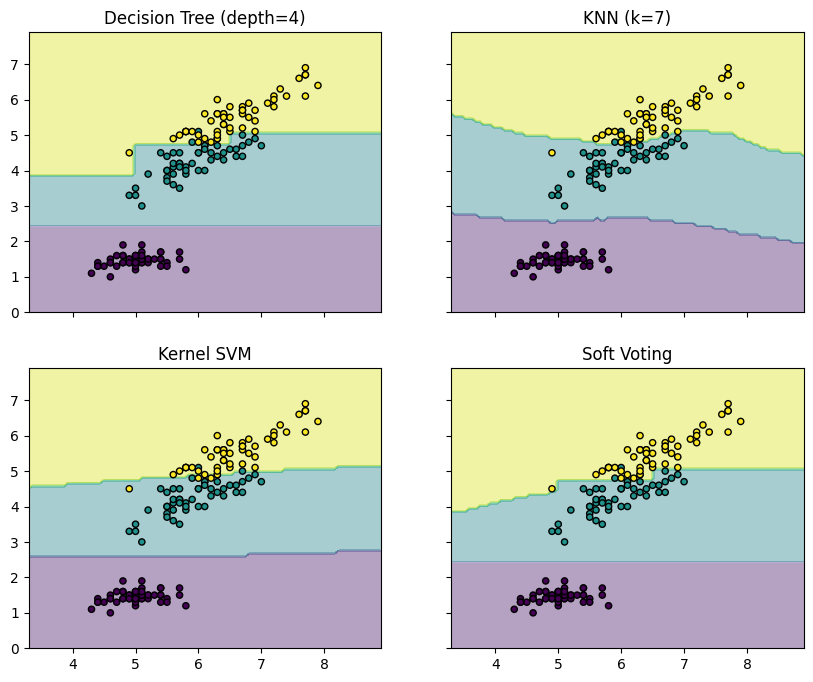

In [25]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 하이퍼파라미터를 튜닝하지 않은 기본 모델로 하는 경우

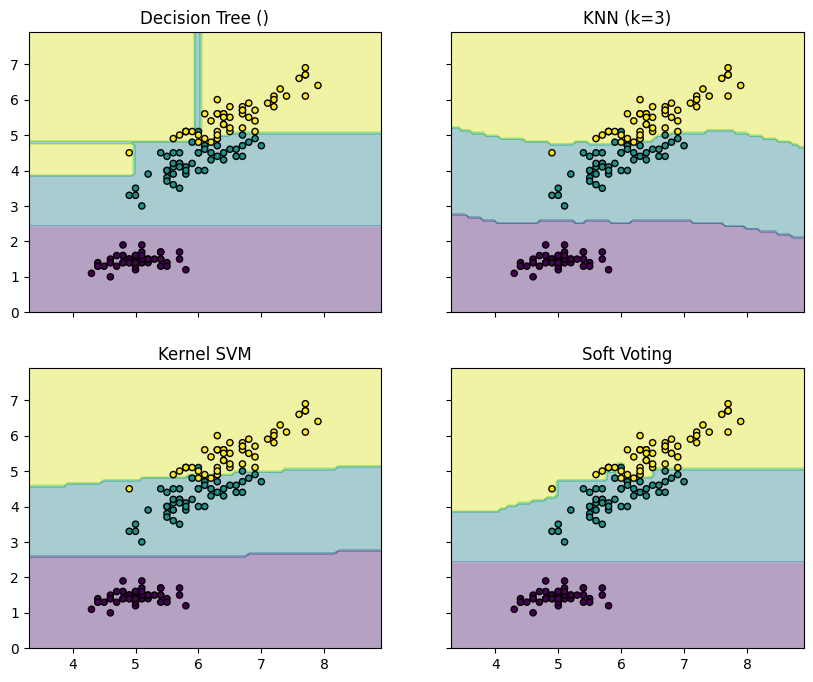

In [26]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree ()", "KNN (k=3)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

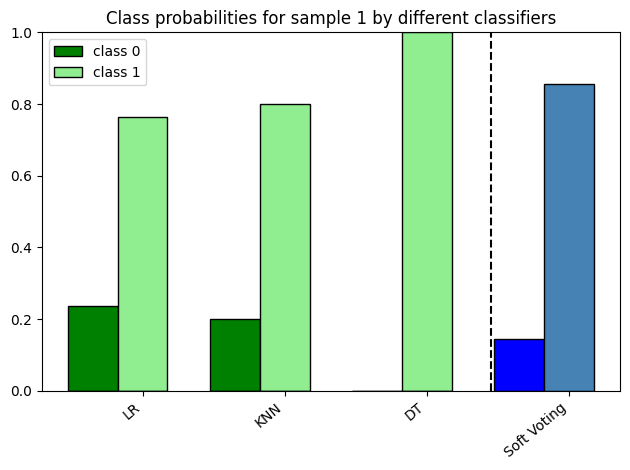

In [27]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=5)
dt_clf = DecisionTreeClassifier()

vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf),('DT',dt_clf)], voting ='soft')

probas = [c.fit(X_train, y_train).predict_proba(X_train) for c in (lr_clf, knn_clf, dt_clf, vo_clf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LR", "KNN", "DT", "Soft Voting"],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 0", "class 1"], loc="upper left")
plt.tight_layout()
plt.show()

## 필수과제
- 공유 드린 데이터셋을 가지고 실제 voting을 통해 하나의 모델을 사용했을 때 정확도나 다른 평가지표보다 더 좋은 성능이 나왔다는 것을 비교해 주세요.
- rf 모델 하나만 사용하거나, dt 하나만 사용했는데, dt, lr, knn 모델 3개를 이용해서 voting을 진행하면 어떤 식으로 나오는지 비교 후 더 좋은 성능이 나오는지 확인!

- voting의 방법 중 soft, hard 둘 다 진행해서 성능을 비교해 주시면 됩니다.